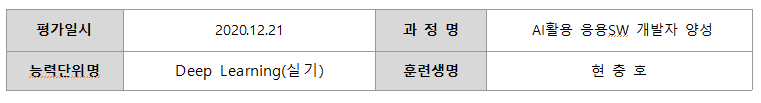

In [24]:
from IPython.display import Image
Image("picture.png", width=1000)

In [1]:
import warnings
warnings.filterwarnings(action='ignore') 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')

# Part 1 - 전국 어린이 사고 vs 스쿨존 갯수 :: 회귀문제
- 스쿨존 갯수와 어린이 교통사고의 선형관계를 기초로 회귀 문제로 접근
- 스쿨존 갯수와 스쿨존의 교통사고는 선형관계가 아니기에 회귀 모델을 사용했을 때 낮은 결과를 확인할 수 있음

In [2]:
df = pd.read_csv("kids_accident.csv", sep = ",", engine = "python")

In [3]:
X = df[['년도','스쿨존_지정(곳)']].values
y1 = df['어린이_교통사고(건)'].values
y2 = df['스쿨존_교통사고(건)'].values

### (1) 스쿨존 갯수 vs 전국 어린이 교통사고 건수 회귀 
- 선형회귀, 리지, 라소 모두 훈련,테스트 세트 점수가 동일하게 나옴 (훈련세트 점수 : 0.96, 테스트 세트 점수 : 0.89)
- 데이터가 단순하기에 모형에 상관없이 거의 비슷한 결과를 출력함을 알 수 있음

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y1, random_state=0, test_size=0.30 )  # y1 데이터를 레이블로 사용 - 전국 어린이 교통사고

In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [-4.12631886e+02 -1.47909687e-01]
lr.intercept_: 845444.2713216374
훈련 세트 점수: 0.96
테스트 세트 점수: 0.89


In [6]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.96
테스트 세트 점수: 0.90


In [7]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))

훈련 세트 점수: 0.96
테스트 세트 점수: 0.89


### (2) 스쿨존 갯수 vs 스쿨존 교통사고 건수 회귀 
- 선형회귀 모델을 사용한 결과 (훈련세트 점수 : 0.34, 테스트 세트 점수 : 0.18)
- 두 데이터가 선형관계가 아니기에 회귀 모델을 적용할 수 없음을 알 수 있음

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y2,random_state=0,test_size=0.30 ) # y2 데이터를 레이블로 사용 - 스쿨존 교통사고

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [-40.24555903   0.0542695 ]
lr.intercept_: 80758.86462690825
훈련 세트 점수: 0.34
테스트 세트 점수: 0.18


***

# Part 2 - 청주 스쿨존 어린이 사고 :: 분류문제
- 신호등, CCTV 정보를 사용하여 스쿨존 어린이 사고 발생 여부를 예측하는 이진분류 문제로 접근

### 1> 데이터 불러오기 + 전처리

In [10]:
zone = pd.read_csv("cj_schoolzone_Data.csv", engine = "python")
data = zone[['대상시설명', '신호등', 'CCTV설치여부', '발생건수']]
data.columns = ['zone', 'lamp','cctv','cnt_a']
data['lamp'] = data['lamp'].map({'Y':1, 'N':0})
data['cctv'] = data['cctv'].map({'Y':1, 'N':0})

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   zone    196 non-null    object
 1   lamp    196 non-null    int64 
 2   cctv    196 non-null    int64 
 3   cnt_a   196 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.2+ KB


### 2> 레이블의 빈도수 확인

In [12]:
data['cnt_a'].value_counts()

0    182
2     12
4      1
1      1
Name: cnt_a, dtype: int64

### 3> 레이블의 불균형을 맞추기 위해 샘플링 갯수 1:1로 추출
- 레이블을 이진 레이블로 가기 위해 발생건수 가 0인 것과 0보다 큰 것으로 분류
- 발생건수가 0보다 큰 경우 값을 1로 통일함  => 사고 발생 유무의 의미가 됨
- 레이블 = 사고 발생 유무 (유 : 1, 무 : 0)
- 사유 발생 유 : 14건 / 무 : 182건 ==> 레이블 빈도수의 불균형을 해소하기 위해 1:1 비율로 (14건, 14건)을 추출함

In [13]:
data.loc[data['cnt_a']>0,'cnt_a']=1
ac_data = data[data['cnt_a']==1].sample(14, random_state=0)
no_data = data[data['cnt_a']==0].sample(14, random_state=0)
df_sample_X = ac_data.append(no_data)
df_y = df_sample_X['cnt_a']
del df_sample_X['cnt_a']
del df_sample_X['zone']
sample_X = df_sample_X.values
y = df_y.values

### 4> 훈련 데이터 셋, 테스트 데이터 셋 추출

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sample_X,y,random_state=50,test_size=0.30)

### 5> 모델 적용
- Logistic Regression와 Decision Tree 적용 결과 동일한 결과를 얻을 수 있었음

#### ▶ Logistic Regression 적용

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_probability = lr.predict_proba(X_test)[:,1]

print("훈련 세트 정확도 : {:.3f}".format(lr.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(lr.score(X_test, y_test)))

훈련 세트 정확도 : 0.684
테스트 세트 정확도 : 0.889


In [16]:
# 학습한 모델의 성능을 계산하여 출력합니다.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("accuracy: %.2f" % accuracy_score(y_test,y_pred))
print("Precision: %.3f" % precision_score(y_test,y_pred))
print("Recall: %.3f" % recall_score(y_test,y_pred))
print("F1: %.3f" % f1_score(y_test,y_pred))

accuracy: 0.89
Precision: 1.000
Recall: 0.667
F1: 0.800


In [17]:
# 학습한 모델의 confusion_matrix을 출력합니다.
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test,y_pred=y_pred)
print(confmat)

[[6 0]
 [1 2]]


##### - ROC curve & AUC (Area Under the Curve)

AUC : 0.889


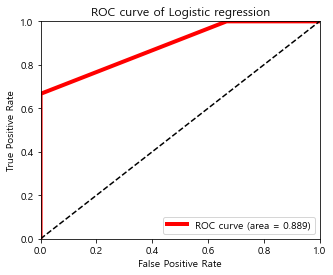

In [18]:
# ROC curve & AUC (Area Under the Curve)
from sklearn.metrics import roc_curve, roc_auc_score

# AUC를 계산하여 출력합니다.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC : %.3f" % roc_auc)

# ROC curve를 그래프로 출력합니다.
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, 
         color='red', linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")

#### ▶ Decision Tree 적용

In [19]:
from sklearn.tree import DecisionTreeClassifier

# 의사결정나무를 학습하고, 학습한 모델로 테스트 데이터셋에 대한 예측값을 반환합니다.
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
y_pred_probability = dtc.predict_proba(X_test)[:,1]

print("훈련 세트 정확도 : {:.3f}".format(dtc.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(dtc.score(X_test, y_test)))

훈련 세트 정확도 : 0.684
테스트 세트 정확도 : 0.889


In [20]:
# 학습한 모델의 성능을 계산하여 출력합니다.
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred))

accuracy: 0.89
Precision : 1.000
Recall : 0.667
F1 : 0.800


##### - ROC curve & AUC (Area Under the Curve)

AUC : 0.889


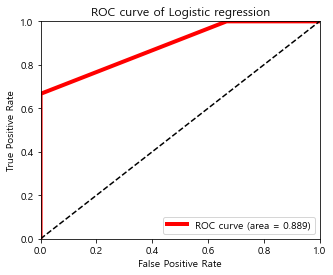

In [21]:
# ROC curve & AUC (Area Under the Curve)
from sklearn.metrics import roc_curve, roc_auc_score

# 학습한 모델의 AUC를 계산하여 출력합니다.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC : %.3f" % roc_auc)

# ROC curve를 그래프로 출력합니다.
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, 
         color='red', linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")